In [39]:
import torch
import numpy
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

In [40]:
train = datasets.MNIST("", train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))      
test = datasets.MNIST("", train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))

In [41]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
test = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [42]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):                           # We want to inherit the methods of nn.Module in our new class "Net" so we write it as like a "base input" (i guess?)
    def __init__(self):                         # Just realized __init__ is like code for "blank space method" and declares starting variables and everything
        super().__init__()                      # super() in front of __init__() initializes the PARENT function (so we actually get its methods) and by virtue of being in an __init__ when called ALSO initializes the current one (which we need to initialize the other methods we're going to write)
        self.fc1 = nn.Linear(28*28, 64)         # this is initializing the first "fully connected (fc)" column of nodes (i think) and specifying it's input (flattened 28x28 MNIST pixel grid) (input, output) -> to 64 other nodes in the hidden layer
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)  
        self.fc4 = nn.Linear(64, 10)            # Outputs our 10 classes

    def forward(self, x):                       # Here we're just taking x, some input and passing it through first the fc1, then fc2, fc3 and so on. DEF FORWARD HERE IS OVERWRITING THE ONE IN NN.MODULE AND IS CALLED/REFERENCED IN THE SUPERCLASS
        x = F.relu(self.fc1(x))                 # F.relu comes from out torch "functions" package. it stands for rectifided linear. It is our ACTIVATION FUNCTION and tells us whether it is activated or not (tries to keep things from exploding)

        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))                 # Our activation function is working on the BACKEND/Outputs not the feeding side
        x = self.fc4(x)

        return F.log_softmax(x, dim = 1)  

In [43]:
net = Net() 

import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr = 0.001)
EPOCHS = 3

In [44]:
net.train()
for epoch in range(EPOCHS):         # Trains our data with 3 rounds of 10 shuffled pictures and labels
    for data in trainset:           # This simply unpacks our training set data
        # data is a batch of feature sets (sets of data that describe our features) and labels
        X, y = data
        net.zero_grad()             # This is "resetting" the gradient between batches
        output = net(X.view(-1, 28*28))             # Passing data into the network. Resizing the data to be flat (-1 is arbitrary. I think you can iterate up through n for each data set?)
        loss = F.nll_loss(output, y)                # nll_loss is like logrithmic error
        loss.backward()                 # Backpropogate 
        optimizer.step()                # This is what does our adjustment
    print(loss)

# print(output)               # Output returns a tensor with various values showing its normalized confidence in each choice

tensor(0.1111, grad_fn=<NllLossBackward>)
tensor(0.0246, grad_fn=<NllLossBackward>)
tensor(0.1019, grad_fn=<NllLossBackward>)
tensor([[-7.8510e+00, -6.1345e+00, -4.6641e+00, -1.0237e+01, -9.9048e-01,
         -7.5132e+00, -4.9468e-01, -8.6533e+00, -5.1445e+00, -8.2344e+00],
        [-2.1230e+01, -2.6101e+01, -2.3129e+01, -2.3859e+01, -2.2839e+01,
         -1.4424e+01, -5.9605e-07, -3.0341e+01, -1.7966e+01, -2.9438e+01],
        [-1.5198e+01, -1.2824e+01, -1.1297e+01, -1.8832e+01, -6.4609e-05,
         -1.3326e+01, -1.0314e+01, -1.3049e+01, -1.1555e+01, -1.2816e+01],
        [-1.7585e+01, -1.5707e+01, -8.9924e+00, -8.3947e+00, -1.6176e+01,
         -8.3437e+00, -2.7706e+01, -1.0000e-03, -1.4088e+01, -7.7989e+00],
        [-9.5708e+00, -1.2348e+01, -1.0711e+01, -1.2471e+01, -1.1271e+01,
         -6.8962e+00, -1.4709e-03, -1.6471e+01, -7.9735e+00, -1.4313e+01],
        [-2.7022e+01, -1.1892e+01, -8.1295e+00, -1.1851e+01, -1.7237e+01,
         -1.8916e+01, -3.0015e+01, -3.0942e-04, -1.8111

In [46]:
correct = 0 
total = 0

with torch.no_grad():
    for data in trainset:           # Its like data grabs an instance of 10 pictures with their labels
        X,y = data      # X has ALL 10 pictures and y has ALL TEN corresponding labels
        output = net(X.view(-1, 784))                # we reshape them to pass through the neural net and collect the output! the -1 says "we don't care about the x. YOU MAKE IT so that it have 784 columns, don't care how many different rounds there are"
        for idx, i in enumerate(output):            # idx stores the index number. i stores all the data
            if torch.argmax(i) == y[idx]:           # because output is in order, the output is ordered by input. SO if the largest value in the output data MATCHES its index correspondant in the label(key), then add one to correct.
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total,3))

Accuracy:  0.98


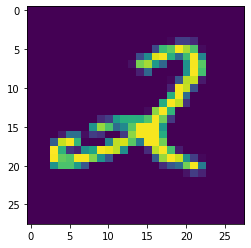

In [47]:
plt.imshow(X[0].view(28,28))
plt.show()

In [56]:
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(2, grad_fn=<NotImplemented>)
